<div style="text-align:center;">
<span style="color:red; font-family:Arial; font-size:40px;">Titanic</span>
</div>

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('titanic.csv')

In [4]:
df.head()

PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S

In [5]:
df['Age'].isna

<bound method Series.isna of 0      34.5
1      47.0
2      62.0
3      27.0
4      22.0
       ... 
413     NaN
414    39.0
415    38.5
416     NaN
417     NaN
Name: Age, Length: 418, dtype: float64>

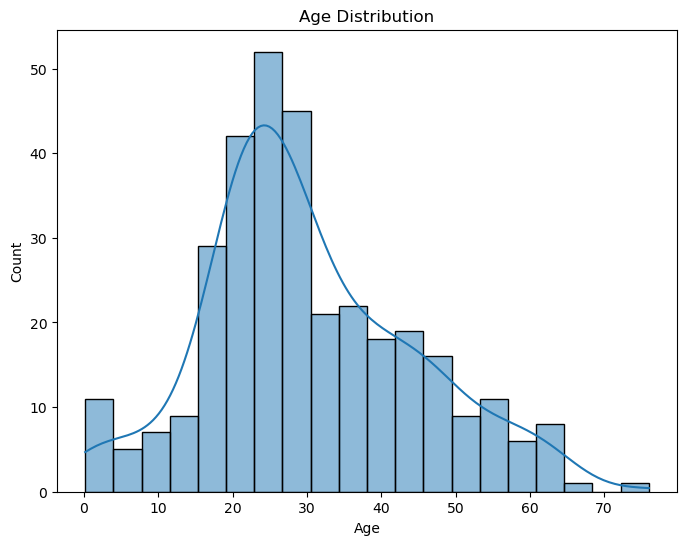

In [6]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [7]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [8]:
df['Age'].isna

<bound method Series.isna of 0      34.50000
1      47.00000
2      62.00000
3      27.00000
4      22.00000
         ...   
413    30.27259
414    39.00000
415    38.50000
416    30.27259
417    30.27259
Name: Age, Length: 418, dtype: float64>

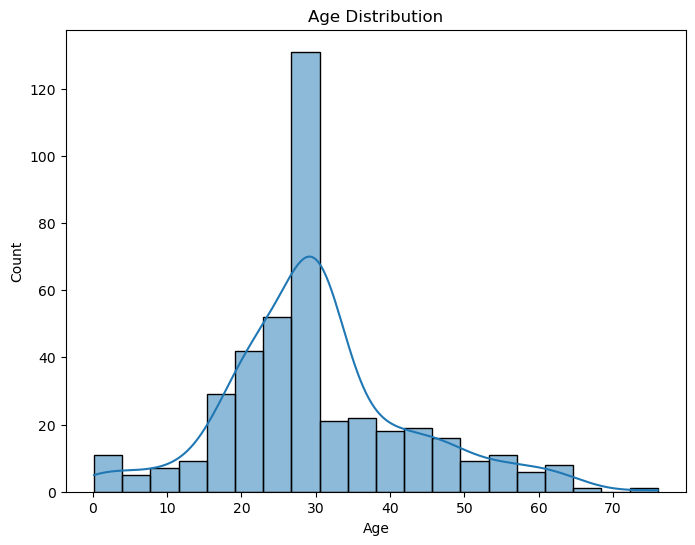

In [9]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [10]:
df['Sex'].isna().sum()

0

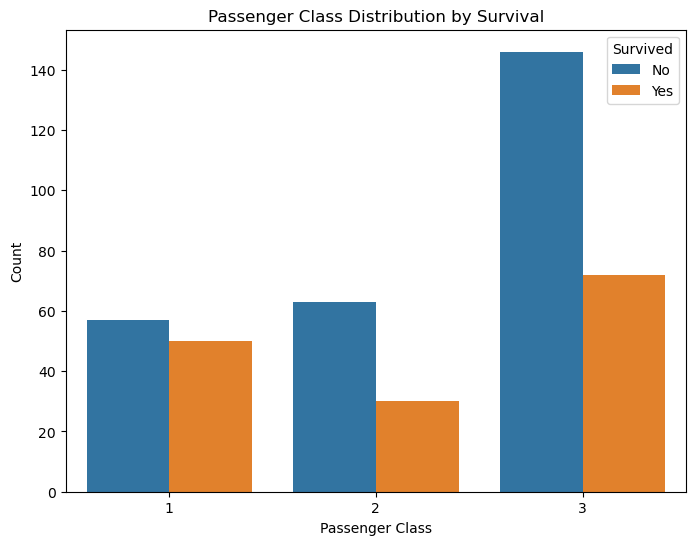

In [11]:
# Corrected code for countplot
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title('Passenger Class Distribution by Survival')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


In [12]:
df['Sex'] = df['Sex'].map({'male':0,'female':1})

In [13]:
df['Sex'].head()

0    0
1    1
2    0
3    0
4    1
Name: Sex, dtype: int64

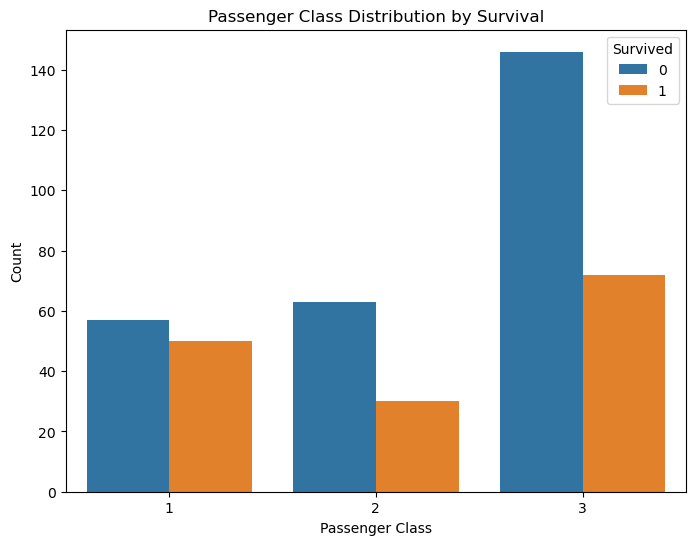

In [14]:
# Corrected code for countplot
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title('Passenger Class Distribution by Survival')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', labels=[0,1])
plt.show()


In [15]:
features = ['Pclass','Age','Sex']

In [16]:
features

['Pclass', 'Age', 'Sex']

In [17]:
X = df[features]
y = df['Survived']

In [18]:
X

Pclass       Age  Sex
0         3  34.50000    0
1         3  47.00000    1
2         2  62.00000    0
3         3  27.00000    0
4         3  22.00000    1
..      ...       ...  ...
413       3  30.27259    0
414       1  39.00000    1
415       3  38.50000    0
416       3  30.27259    0
417       3  30.27259    0

[418 rows x 3 columns]

In [19]:
y

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
X_train

Pclass       Age  Sex
336       2  32.00000    0
31        2  24.00000    0
84        2  30.27259    0
287       1  24.00000    0
317       2  19.00000    0
..      ...       ...  ...
71        3  21.00000    0
106       3  21.00000    0
270       1  46.00000    0
348       2  24.00000    0
102       3  30.27259    0

[334 rows x 3 columns]

In [22]:
X_test

Pclass   Age  Sex
321       3  25.0    0
324       1  39.0    1
388       3  21.0    0
56        3  35.0    0
153       3  36.0    1
..      ...   ...  ...
57        3  25.0    0
126       3  22.0    0
24        1  48.0    1
17        3  21.0    0
66        3  18.0    1

[84 rows x 3 columns]

In [23]:
y_test

321    0
324    1
388    0
56     0
153    1
      ..
57     0
126    0
24     1
17     0
66     1
Name: Survived, Length: 84, dtype: int64

In [24]:
y_train

336    0
31     0
84     0
287    0
317    0
      ..
71     0
106    0
270    0
348    0
102    0
Name: Survived, Length: 334, dtype: int64

In [25]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [26]:
model

LogisticRegression()

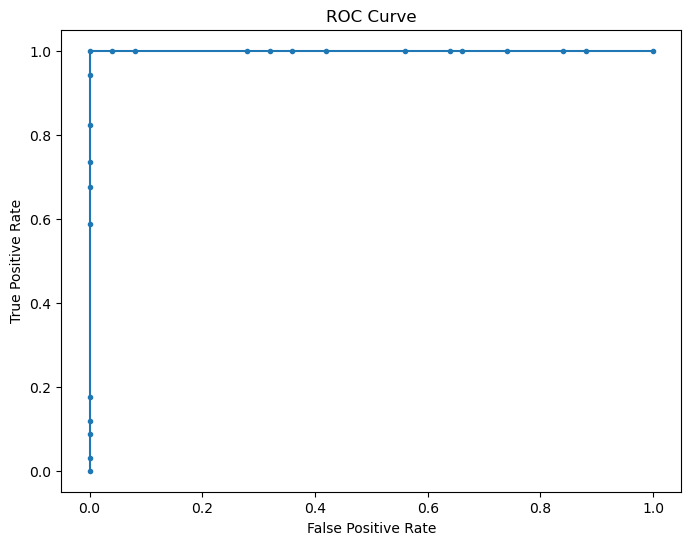

In [27]:
y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [28]:
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f'ROC AUC Score: {roc_auc:.2f}')

ROC AUC Score: 1.00


In [29]:
y_pred = model.predict(X_test)

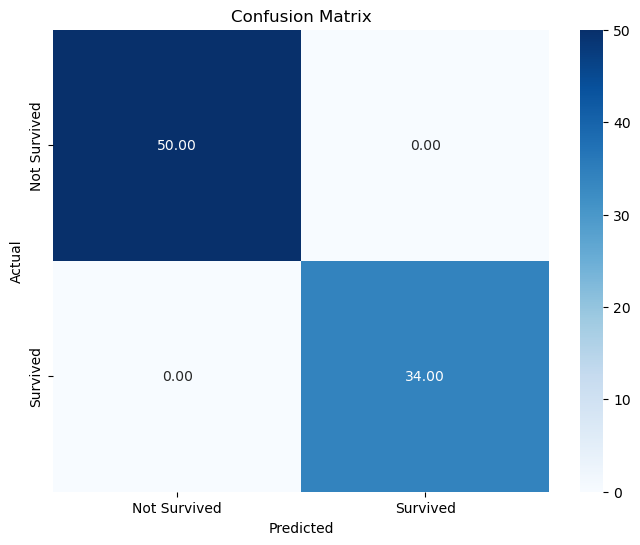

In [30]:
confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='.2f', cmap='Blues',xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'] )
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [31]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [33]:
print(confusion_matrix(y_test, y_pred))

[[50  0]
 [ 0 34]]


In [34]:
feature_importance = model.coef_[0]
for i, feature in enumerate(features):
    print(f'{feature}: {feature_importance[i]:.2f}')

Pclass: -0.17
Age: -0.00
Sex: 6.34
